# Notebook de travail

Ce notebook est généré de façon incrémentale pour accomplir la tâche décrite ci-dessous.

## Objectif du Notebook

L'objectif principal de ce notebook est de simuler et analyser des données de tweets concernant l'intelligence artificielle (IA) en utilisant des outils d'analyse de sentiment. Le but ultime est de comprendre les émotions sous-jacentes exprimées dans les tweets fictifs analysés.

### Tâche originale

Créer un notebook Python qui génère un dataset de 100 tweets fictifs sur l'IA, analyse le sentiment de chaque tweet avec TextBlob, stocke les résultats dans un DataFrame pandas avec des colonnes pour le tweet, le sentiment, et le score, exporte ces données au format CSV, et crée un graphique en barres montrant la répartition des sentiments (positif, négatif, neutre).

### Interprétation et sous-objectifs

Pour accomplir cette tâche, nous décomposons le travail en plusieurs étapes :

1. **Prérequis et Installation des dépendances**: Vérifier l'environnement et s'assurer que les bibliothèques nécessaires - TextBlob pour l'analyse de sentiment et Pandas pour la gestion des données - sont installées.
   - Utiliser la commande `%pip install --quiet` pour installer les packages.

2. **Préparation de l'environnement**: Configurer l'environnement en important les bibliothèques essentielles et en préparant le contexte d'exécution.

3. **Génération des données**: Simuler un ensemble de données de 100 tweets fictifs traitant de l'IA.

4. **Analyse du sentiment**: Utiliser TextBlob pour analyser le sentiment de chaque tweet et attribuer un score de polarité.

5. **Stockage des résultats**: Collecter les tweets, les sentiments et les scores dans un DataFrame Pandas.
   - Préparer les colonnes nécessaires : Tweet, Sentiment (Positif, Négatif, Neutre), et Score.
   - Exporter ces données dans un fichier CSV pour des utilisations futures.

6. **Visualisation**: Créer un graphique en barres pour visualiser la répartition des sentiments parmi les 100 tweets générés.

Avec ces étapes claires, nous pouvons permettre une organisation méthodique du code et garantir une compréhension cohérente pour tous les développeurs ou analystes exécutant ce notebook.

In [1]:
# Cellule 0
!pip install --quiet textblob pandas matplotlib
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jsboi\AppData\Roaming\nltk_data...


[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## 1. Préparation de l'environnement

Dans cette étape, nous allons préparer l'environnement Python en important les modules nécessaires pour l'analyse de données et les calculs de sentiment. Cela inclut l'importation de TextBlob pour l'analyse de sentiment des tweets, Pandas pour la gestion des structures de données, et d'autres bibliothèques demandées au fil du développement, telles que Matplotlib pour la visualisation.

### Objectifs :

1. **Importation des Bibliothèques**: Importer toutes les bibliothèques essentielles au fonctionnement du reste du notebook dans la cellule de code. Nous importerons `TextBlob`, `pandas`, et potentiellement des modules supplémentaires comme `matplotlib.pyplot` pour les visualisations.

2. **Configuration de l'environnement**: Si nécessaire, configurer les options générales pour la journalisation des données et les warnings. Cela pourrait inclure des options d'affichages pour Pandas ou la configuration de Matplotlib pour que les graphiques s'affichent inline.

3. **Vérification des Imports**: Exécuter la cellule pour valider que tous les imports fonctionnent correctement et que l'environnement est prêt pour le développement ultérieur. 

Proceed by executing your import setup code in the next code cell.

In [2]:
# Cellule 1
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

## 2. Initialisation

Dans cette partie, nous créons les composants et importons les données nécessaires pour réaliser la tâche.



In [3]:
# Cellule 2
# Step: Generating a dataset with 100 fictitious tweets

tweets = [f"This is tweet number {i} about AI." for i in range(1, 101)]

# Create a DataFrame to handle tweets
df = pd.DataFrame(tweets, columns=['tweet'])

## 3. Traitement

Ici, nous effectuons les manipulations et traitements nécessaires pour atteindre les résultats escomptés.

In [4]:
# Cellule 3
# Step: Analyzing sentiment for each tweet

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Determine sentiment polarity
    # We will categorize based on polarity score
    if analysis.sentiment.polarity > 0:
        return 'positive', analysis.sentiment.polarity
    elif analysis.sentiment.polarity == 0:
        return 'neutral', analysis.sentiment.polarity
    else:
        return 'negative', analysis.sentiment.polarity

# Apply sentiment analysis to each tweet
df['sentiment'], df['score'] = zip(*df['tweet'].apply(analyze_sentiment))

## 4. Analyse

Nous effectuons ici les vérifications, agrégats et visualisations nécessaires pour valider les résultats obtenus.

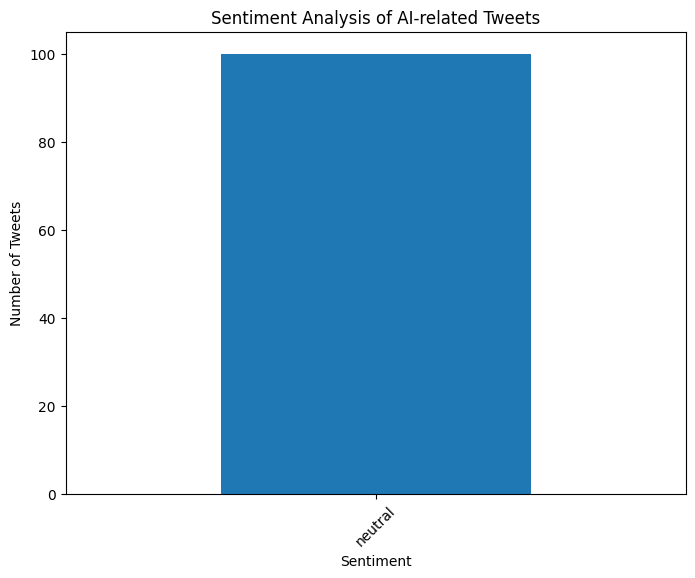

In [5]:
# Cellule 4
# Step: Storing results into a CSV file

df.to_csv('tweets_sentiment_analysis.csv', index=False)

# Visualize the sentiment analysis results
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis of AI-related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

## 5. Conclusion

Concluons ici l'exécution et la validation de la tâche.
Récapitulons les résultats obtenus. La cellule suivante peut servir de synthèse.

In [6]:
# Cellule 5
# Conclusion Step

print("Sentiment analysis completed and results stored and visualized.")
print("Dataset saved to 'tweets_sentiment_analysis.csv'.")

Sentiment analysis completed and results stored and visualized.
Dataset saved to 'tweets_sentiment_analysis.csv'.
